In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from helper_functions import regressor, scatter_compare, data_cleaner, date_to_decimal_year, volcano_rain_frame, data_cleaner

In [2]:
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))


In [20]:
volcanos = {'Wolf': (-91.20, 0.0), 'Fernandina': (-91.33, -0.22), 'Negra, Sierra': (-91.17, -0.83), 'Azul, Cerro': (-91.24, -0.55), 'Bellavista': (-90.33, -.69), 'Ayora': (-90.302647,-.743708)} # Long/lat pairs must exist in rainfall data
pick = 'Wolf' # Choose a volcano or site to analyze rainfall at
lat_range = .05 # enter desired latitude range
lon_range = .05 # enter desired longitude range
compare_site = ayora  # Choose ayora or bellavista to compare rainfall to (this is the gauge site)
site_name = 'Ayora' # Same choice as for compare_site, but as a string and capitalized
rolling_number = 90 # Number of days to average rainfall over
print_summary = True # Make true if you want to see summary of regression

rain_frame = volcano_rain_frame(rainfall, volcanos, pick, rolling_number, lat_range, lon_range)
compare_frame = data_cleaner(compare_site, rolling_number)



In [46]:
# rain_two = rain_frame.copy()
# compare_two = compare_frame.copy()
# rain_two['roll'] = rain_frame['roll'].apply(lambda x: np.log(x+1))
# compare_two['roll_two'] = compare_frame['roll_two'].apply(lambda x: np.log(x+1))

In [24]:
reg = regressor(rain_frame, volcanos, pick, compare_frame, rolling_number, print_summary)

                            OLS Regression Results                            
Dep. Variable:               roll_two   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                 1.125e+04
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:40:00   Log-Likelihood:                -9738.7
No. Observations:                8254   AIC:                         1.948e+04
Df Residuals:                    8252   BIC:                         1.950e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4889      0.010     49.893      0.0

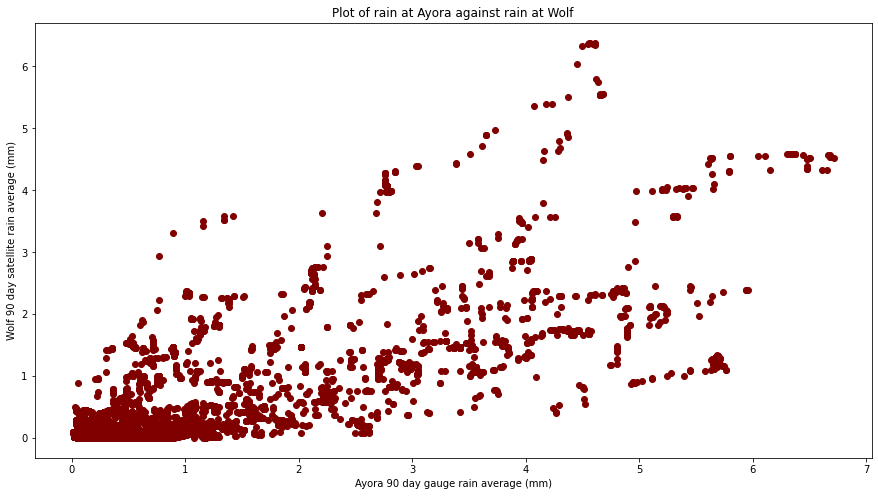

In [25]:
scatter_compare(rain_frame, pick, compare_frame, site_name, rolling_number)